Le code provient de plusieurs notebook. La fonction read_csv est utilisée afin de réduire le temps de scrapping 

In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from time import sleep
import numpy as np
import time
import requests as req
import urllib
import pandas as pd
import re
import requests


# Data.gouv

In [2]:
url = "https://recherche.data.gouv.fr/fr/faq"
response_gouv = requests.get(url)
if response_gouv.status_code == 200:
    soup = BeautifulSoup(response_gouv.text, 'html.parser')
    reponses_gouv = soup.find_all(id=lambda x: x and x.startswith("accordion-"))
    liste_reponses_gouv = []
    for reponse in reponses_gouv:
        liste_reponses_gouv.append(reponse.text.strip())

liste_reponses_gouv

["Oui, l'URL privée permet d’accéder aux fichiers d’un jeu de données non encore publié (statut draft), même si ces fichiers sont en accès restreint.",
 "Oui, si les métadonnées apportent des informations complémentaires à celles saisies dans l'entrepôt-catalogue Recherche Data Gouv.\nNote :\xa0Dans le cas où l’autre entrepôt attribue un DOI, il ne faut pas créer de jeu de données dans l'entrepôt-catalogue Recherche Data Gouv.",
 'On peut restreindre l’accès à un fichier d’un jeu de données. L’entrepôt Recherche Data Gouv ne gère pas automatiquement la durée de cette restriction d’accès (embargo), il revient au déposant du jeu de données d’enlever la restriction le moment venu.\xa0\nPour limiter l’accès à un jeu de données dans son ensemble, il ne doit pas avoir été publié. L’accès à ce jeu de données ne sera alors possible qu’aux personnes autorisées ou via son\xa0URL privée.\nOn ne peut pas limiter l’accès à une collection publiée.',
 'La métadonnée "Link to data" indique le lien dir

In [5]:
driver = webdriver.Safari()
driver.get('https://recherche.data.gouv.fr/fr/faq')  
time.sleep(2)
boutton=driver.find_element(By.XPATH, '/html/body/div[3]/main/div[3]/div/div[2]/div/button')
boutton.click()
q = driver.find_elements(By.TAG_NAME, 'button')
question_gouv = [button.text for button in q if button.text != '']


ElementNotInteractableException: Message: 


In [3]:

df_gouv = pd.read_csv('df_gouv.csv')
#df_gouv['question'] = question_gouv[5:-1]
#df_gouv['reponse'] = reponses_gouv
df_gouv['url'] = 'https://recherche.data.gouv.fr/fr/faq'
df_gouv['secteur'] = 'Administration'
df_gouv['source'] = 'faq .gouv.fr'
df_gouv

,question,reponse,url,secteur,source
0,"Si on transmet une URL privée à un reviewer, a...","<div class=""fr-collapse faq_right"" id=""accordi...",https://recherche.data.gouv.fr/fr/faq,Administration,faq .gouv.fr
1,Si les données sont déjà entreposées ailleurs ...,"<div class=""fr-collapse faq_right"" id=""accordi...",https://recherche.data.gouv.fr/fr/faq,Administration,faq .gouv.fr
2,Peut-on limiter l’accès ou mettre un embargo à...,"<div class=""fr-collapse faq_right"" id=""accordi...",https://recherche.data.gouv.fr/fr/faq,Administration,faq .gouv.fr
3,Faut-il indiquer dans Link to data un lien dir...,"<div class=""fr-collapse faq_right"" id=""accordi...",https://recherche.data.gouv.fr/fr/faq,Administration,faq .gouv.fr
4,Est-ce que les métadonnées de Recherche Data G...,"<div class=""fr-collapse faq_right"" id=""accordi...",https://recherche.data.gouv.fr/fr/faq,Administration,faq .gouv.fr
...,...,...,...,...,...
83,Un modèle peut-il être appliqué à des jeux de ...,"<div class=""fr-collapse faq_right"" id=""accordi...",https://recherche.data.gouv.fr/fr/faq,Administration,faq .gouv.fr
84,Peut-on avoir plusieurs modèles pour une même ...,"<div class=""fr-collapse faq_right"" id=""accordi...",https://recherche.data.gouv.fr/fr/faq,Administration,faq .gouv.fr
85,Les modèles concernent-ils les collections ou ...,"<div class=""fr-collapse faq_right"" id=""accordi...",https://recherche.data.gouv.fr/fr/faq,Administration,faq .gouv.fr
86,Est-il possible de moissonner Zenodo ?,"<div class=""fr-collapse faq_right"" id=""accordi...",https://recherche.data.gouv.fr/fr/faq,Administration,faq .gouv.fr


# College de France

In [7]:
driver = webdriver.Safari()
wait = WebDriverWait(driver, 10)
driver.get('https://www.college-de-france.fr/fr/le-college-en-10-questions')  # Remplacez par l'URL de la FAQ
time.sleep(2)
q = driver.find_elements(By.TAG_NAME, 'h2')
question_college = [button.text for button in q if button.text != '']
r = driver.find_elements(By.TAG_NAME, 'p')
reponse_college= [button.text for button in r if button.text != '']

In [8]:
reponse_college

["Selon sa devise Docet Omnia, on y enseigne toutes choses\xa0: les quelques 50 chaires d'enseignement et de recherche du Collège de France, chacune occupée par un professeur, couvrent tous les domaines du savoir, des mathématiques et de l'informatique jusqu'à la littérature et aux arts, en passant par la physique, la chimie, la biologie, la paléoanthropologie, l'histoire, le droit, l'économie, la sociologie...",
 'Tous les enseignements du Collège de France (cours, séminaires, colloques...) sont entièrement ouverts au public, et le site principal de la place Marcelin Berthelot, où se trouvent amphithéâtres et salles de cours, est ainsi accessible à tous les auditeurs.',
 "Le site Cardinal Lemoine, qui abrite l'Institut des civilisations, et le site Ulm sont réservés aux activités de recherche.",
 "Les cours sont ouverts à tous, sans condition d'inscription ni de diplôme. Il suffit de se présenter quelques minutes avant l'heure prévue au cours pour pouvoir y assister, dans la limite de

In [4]:
df_college = pd.read_csv('df_college.csv')
#df_college['question'] = question_college[1:]
#df_college['reponse'] = reponse_college
df_college['url'] = 'https://www.college-de-france.fr/fr/le-college-en-10-questions'
df_college['secteur'] = 'Scolarité'
df_college['source'] = 'College de France'
df_college

,question,reponse,url,secteur,source
0,Qu'enseigne-t-on au Collège de France ?,"Selon sa devise Docet Omnia, on y enseigne tou...",https://www.college-de-france.fr/fr/le-college...,Scolarité,College de France
1,Le Collège de France est-il ouvert au public ?,Tous les enseignements du Collège de France (c...,https://www.college-de-france.fr/fr/le-college...,Scolarité,College de France
2,Qui peut assister aux cours ?,"Le site Cardinal Lemoine, qui abrite l'Institu...",https://www.college-de-france.fr/fr/le-college...,Scolarité,College de France
3,Qui sont les professeurs du Collège de France ?,"Les cours sont ouverts à tous, sans condition ...",https://www.college-de-france.fr/fr/le-college...,Scolarité,College de France
4,Le Collège de France délivre-t-il un diplôme ?,Les professeurs du Collège de France sont élus...,https://www.college-de-france.fr/fr/le-college...,Scolarité,College de France
5,Quelles recherches fait-on au Collège de France ?,"Un professeur est soit titulaire d’une chaire,...",https://www.college-de-france.fr/fr/le-college...,Scolarité,College de France
6,Peut-on suivre les cours à distance ?,"Les cours sont entièrement libres d’accès, et ...",https://www.college-de-france.fr/fr/le-college...,Scolarité,College de France
7,Où se procurer les publications du Collège de ...,Les étudiants inscrits dans une école doctoral...,https://www.college-de-france.fr/fr/le-college...,Scolarité,College de France
8,Comment avoir accès aux bibliothèques du Collè...,Les recherches menées sont aussi étendues et v...,https://www.college-de-france.fr/fr/le-college...,Scolarité,College de France
9,Qui peut travailler au Collège de France ?,La très grande majorité des enseignements du C...,https://www.college-de-france.fr/fr/le-college...,Scolarité,College de France


# Institut Pasteur 

In [11]:
driver = webdriver.Safari()
wait = WebDriverWait(driver, 10)
driver.get('https://www.pasteur.fr/fr/sante-publique/crbip/faq') 
time.sleep(2)
q2 = driver.find_elements(By.TAG_NAME, 'h2')
question_pasteur = [button.text for button in q2 if button.text != '']
r2 = driver.find_elements(By.TAG_NAME, 'p')
reponse_pasteur= [button.text for button in r2 if button.text != '']

In [12]:
for i in reponse_pasteur:
    if i == ' ': 
        reponse_pasteur.remove(i)

In [5]:
df_pasteur = pd.read_csv('df_pasteur.csv')
#df_pasteur['question'] = question_pasteur
#df_pasteur['reponse'] = reponse_pasteur[:-2]
df_pasteur['url'] = 'https://www.pasteur.fr/fr/sante-publique/crbip/faq'
df_pasteur['secteur'] = 'Santé'
df_pasteur['source'] = 'Institut Pasteur'
df_pasteur

,question,reponse,url,secteur,source
0,QUEL EST LE RÔLE D'UN CENTRE DE RESSOURCES BIO...,Son rôle est de regrouper des collections de m...,https://www.pasteur.fr/fr/sante-publique/crbip...,Santé,Institut Pasteur
1,QUEL EST L'INTÉRÊT D'UN CENTRE DE RESSOURCES B...,• élargir le nombre de ressources biologiques ...,https://www.pasteur.fr/fr/sante-publique/crbip...,Santé,Institut Pasteur
2,QUELLE EST LA DIFFÉRENCE ENTRE UN CENTRE DE RE...,Un Centre de Ressources Biologiques peut être ...,https://www.pasteur.fr/fr/sante-publique/crbip...,Santé,Institut Pasteur
3,QUELLE EST LA DÉFINITION DE L'ESPÈCE BACTÉRIEN...,De nombreux renseignements concernant la nomen...,https://www.pasteur.fr/fr/sante-publique/crbip...,Santé,Institut Pasteur
4,QUELLE EST LA DÉFINITION D'UNE SOUCHE TYPE ?,Une souche type est une souche qui définit une...,https://www.pasteur.fr/fr/sante-publique/crbip...,Santé,Institut Pasteur
5,QU'EST CE QUE LA NOMENCLATURE BACTÉRIENNE ?,Toutes les informations concernant la nomencla...,https://www.pasteur.fr/fr/sante-publique/crbip...,Santé,Institut Pasteur
6,PEUT-ON UTILISER UN AUTRE MILIEU QUE CELUI REC...,"Dans la plupart des cas, les bactéries peuvent...",https://www.pasteur.fr/fr/sante-publique/crbip...,Santé,Institut Pasteur
7,PEUT-ON EFFECTUER DES SUBCULTURES À PARTIR DE ...,Les transferts répétés de cultures bactérienne...,https://www.pasteur.fr/fr/sante-publique/crbip...,Santé,Institut Pasteur
8,QUELLES SONT LES PRINCIPALES CAUSES D'ABSENCE ...,Il peut s’agir de :\n\n. l’utilisation non com...,https://www.pasteur.fr/fr/sante-publique/crbip...,Santé,Institut Pasteur
9,QUELLE EST LA MEILLEURE MÉTHODE POUR CONSERVER...,Le stockage en azote liquide est sans aucun do...,https://www.pasteur.fr/fr/sante-publique/crbip...,Santé,Institut Pasteur


# Ratp

In [17]:
driver = webdriver.Safari()
wait = WebDriverWait(driver, 10)
driver.get('https://www.ratp.fr/aide-contact/questions/fonctionnement-du-reseau')
wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="popin_tc_privacy_button_3"]'))).click()
lien= driver.find_elements(By.XPATH, '//a[@class="question"]')
links = [link.get_attribute('href') for link in lien]
driver.quit()

In [18]:
driver = webdriver.Safari()
wait = WebDriverWait(driver, 10)

questions_ratp = []
reponses_ratp = []
for lien in links:
    driver.get(lien)
    try: 
        wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="popin_tc_privacy_button_3"]'))).click()
    except:
        pass
    wait.until(EC.visibility_of_element_located((By.TAG_NAME, 'h3')))  
    q = driver.find_elements(By.TAG_NAME, 'h3')
    r = driver.find_elements(By.XPATH, '//*[@id="row-reponse-0"]//p')
    questions_ratp.append([elem.text for elem in q if elem.text != '']) 
    reponses_ratp.append([elem.text for elem in r if elem.text != '']) 
driver.quit()


In [6]:
df_ratp = pd.read_csv('dataset.csv')
df_ratp = df_ratp[1:]
df_ratp['Question'] = df_ratp['Question'].apply(lambda x: x[5:-4].strip())
df_ratp['Reponse'] = df_ratp['Reponse'].apply(lambda x: x[2:-2].strip())
df_ratp['url'] = 'https://www.ratp.fr/aide-contact/questions/fonctionnement-du-reseau'
df_ratp['secteur'] = 'transport'
df_ratp['source'] = 'ratp'
df_ratp.rename(columns={'Question':'question', 'Reponse':'reponse'}, inplace=True)

# Expédia

In [ ]:
questions_expedia = []
reponses_expedia = []
driver = webdriver.Safari()
driver.get('https://welcome.expediagroup.com/fr/help-and-faqs/faqs') 
time.sleep(2)
boutton = driver.find_elements(By.XPATH, '//div[@class="faq-accordion__item"]')
for element in boutton:
    q = element.find_elements(By.XPATH, './/button')
    r = element.find_elements(By.XPATH, './/div/p')
    questions_expedia.append([elem.text for elem in q if elem.text != '']) 
    reponses_expedia.append([elem.text for elem in r if elem.text != ''])

In [7]:
df_expedia = pd.read_csv('df_expedia.csv')
df_expedia = df_expedia.drop(df_expedia.columns[0], axis=1)

df_expedia['question'] = df_expedia['Question'].apply(lambda x: x[2:-2].strip())
df_expedia['reponse'] = df_expedia['Reponse'].apply(lambda x: x[2:-2].strip())
df_expedia['url'] = 'https://welcome.expediagroup.com/fr/help-and-faqs/faqs'
df_expedia['secteur'] = 'transport'
df_expedia['source'] = 'expedia'
df_expedia.drop(['Question', 'Reponse'], axis=1, inplace=True)

# BCE

In [8]:
req = req.get('https://www.concours-bce.com/la-foire-aux-questions')

html = req.text
soup= BeautifulSoup(html,'html.parser')

In [9]:
noms = soup.findAll('a',{'class':'trigger'})
questions_Bce = [noms.get_text() for noms in noms]
questions_Bce

['Comment dois-je m’inscrire ?',
 'Je suis en classe préparatoire, suis-je obligé(e) de m’inscrire au concours correspondant à la voie de ma classe préparatoire ?',
 'Je suis en classe préparatoire ECG, suis-je obligé(e) de m’inscrire au concours correspondant à mon parcours en 2ème année de classe préparatoire ?',
 'Je ne suis pas en possession de mon diplôme du baccalauréat ?',
 "Ma carte nationale d'identité (CNI) ou/et mon passeport est périmé(e) ?",
 "Je n'ai pas effectué ma Journée Défense et Citoyenneté (JDC), que dois-je faire ?",
 'Combien de fois est-il possible de passer un même concours de la BCE ?',
 'Je veux changer mon mot de passe, comment faire ?',
 'Je veux signer électroniquement (valider) mon inscription, comment faire ?',
 "Comment m'inscrire au concours d'administrateur stagiaire de l'INSEE ?",
 "Comment m'inscrire au concours d'attaché statisticien de l'INSEE ?",
 'J’ai réglé mes droits d’inscription mais je ne souhaite plus passer les concours. Puis-je me faire 

In [10]:
rep = soup.findAll('div',{'class':'faq-content'})
réponses_bce = [rep.get_text() for rep in rep]
réponses_bce

["\nLes inscriptions ne se font que par internet.\nVous êtes candidat de la filière économique et commerciale voie générale et voie technologique : www.concours-bce.com\nVous êtes candidat de la filière littéraire voie B/L :\xa0www.concours-bce.com\nVous êtes candidat de la filière littéraire voie BEL :\xa0www.concours-bel.fr\nSi vous avez besoin d'aide pour vous inscrire, consultez le mode d'emploi depuis l'espace candidat.\n\n",
 "\nL'inscription à la voie technologique de la filière économique et commerciale est réservée aux candidats titulaires d'un baccalauréat technologique ou professionnel obtenu antérieurement à leur entrée dans l'enseignement supérieur.\nL'inscription à la voie générale\xa0de la filière économique et commerciale est réservée aux candidats titulaires d'un baccalauréat général obtenu antérieurement à leur entrée dans l'enseignement supérieur.\n\n",
 '\nOui, pour une inscription en voie ECG, dans la rubrique «\xa0Banques/Concours/Options", vous devez sélectionner

In [11]:
df_bce = pd.DataFrame({'question': questions_Bce, 'reponse': réponses_bce})
df_bce['url'] = 'https://www.concours-bce.com/la-foire-aux-questions'
df_bce['secteur'] = 'Economique'
df_bce['source'] = 'Banque centrale Européenne'
df_bce

,question,reponse,url,secteur,source
0,Comment dois-je m’inscrire ?,\nLes inscriptions ne se font que par internet...,https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne
1,"Je suis en classe préparatoire, suis-je obligé...",\nL'inscription à la voie technologique de la ...,https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne
2,"Je suis en classe préparatoire ECG, suis-je ob...","\nOui, pour une inscription en voie ECG, dans ...",https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne
3,Je ne suis pas en possession de mon diplôme du...,\nVous pouvez téléverser votre relevé de notes...,https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne
4,Ma carte nationale d'identité (CNI) ou/et mon ...,\nLa durée de validité de la pièce d’identité ...,https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne
5,Je n'ai pas effectué ma Journée Défense et Cit...,"\n\nConformément au règlement du concours, vou...",https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne
6,Combien de fois est-il possible de passer un m...,\nVous pouvez vous présenter trois fois maximu...,https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne
7,"Je veux changer mon mot de passe, comment faire ?","\nIl vous suffit de cliquer sur ""codes perdus ...",https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne
8,Je veux signer électroniquement (valider) mon ...,"\nCliquez sur la rubrique ""Confirmation d’insc...",https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne
9,Comment m'inscrire au concours d'administrateu...,\nPour s'inscrire au concours d'administrateur...,https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne


# Ursaaf

In [ ]:
hrefs = []
driver = webdriver.Safari()
url = 'https://www.urssaf.fr/portail/home.html'
driver.get(url)
eip = driver.find_elements(By.XPATH, "//ul[@class='list-style-type-none']/li/a")
eip_links = [link.get_attribute('href') for link in eip]
for link in eip_links:
    driver.get(link)
    sous_cat = driver.find_elements(By.XPATH, "//div[@class='col-md-6']/a")
    link_cat = [link.get_attribute('href') for link in sous_cat]
    for cat in link_cat:
        driver.get(cat)
        EC.element_to_be_clickable((By.XPATH, "//li[@class=' dropdown hasChildren']/ul/li/a"))
        links = driver.find_elements(By.XPATH, "//li[@class=' dropdown hasChildren']/ul/li/a")
        hrefs.append([link.get_attribute('href') for link in links])
driver.quit()
hrefs = [lien for sous_liste in hrefs for lien in sous_liste]

questions_ursaaf = []
answers_ursaaf = []
driver = webdriver.Safari()
for href in hrefs:
    print(href)
    driver.get(href)
    wait = WebDriverWait(driver, 10)
    try:
       question = driver.find_element(By.XPATH, '//article/h1').text
       questions_ursaaf.append(question)
    except:
       questions_ursaaf.append(np.nan)
    try:
       reponse_text = [element.text for element in driver.find_elements(By.XPATH, '//[@id="contenuPage"]/div/div/div[2]/div[1]/div[1]/article/div[2]//')]
       answers_ursaaf.append(''.join(reponse_text))
    except:
         answers_ursaaf.append(np.nan)
driver.quit()

In [12]:
df_urssaf = pd.read_csv('urssaf_faq.csv')
df_urssaf = df_urssaf.dropna(subset=['Question'])
df_urssaf = df_urssaf[df_urssaf['Question'].str.contains('\?')]
df_urssaf['url'] = 'https://www.urssaf.fr/portail/home.html'
df_urssaf['secteur'] = 'Administratif'
df_urssaf['source'] = 'urssaf'
df_urssaf.rename(columns={'Question':'question', 'Reponse':'reponse'}, inplace=True)

# Parcoursup

In [ ]:
questions_parcour = []
reponses_parcour = []

driver = webdriver.Chrome()
driver.get('https://www.parcoursup.gouv.fr/outils-et-ressources#fr-s-accordion-8090942') 
time.sleep(20)

bouttons = driver.find_elements(By.XPATH, '//div[@class="fr-accordions-group"]')

for element in bouttons:
    q = element.find_elements(By.XPATH, './/section/h4/button/strong')
    r = element.find_elements(By.XPATH, './/section/div/div')
    for question in q:
        questions_parcour.append(question.text)
    for reponse in r:
        reponses_parcour.append(reponse.text)

driver.quit()

In [13]:
df_parcoursup = pd.read_csv('parcour.csv')
df_parcoursup['url'] = 'https://www.parcoursup.gouv.fr/outils-et-ressources#fr-s-accordion-8090942'
df_parcoursup['secteur'] = 'education'
df_parcoursup['source'] = 'parcoursup'
df_parcoursup

,Question,Reponse,url,secteur,source
0,Quels sont les éléments dont j'ai besoin pour ...,"Dans tous les cas, il vous faut obligatoiremen...",https://www.parcoursup.gouv.fr/outils-et-resso...,education,parcoursup
1,J'étais déjà inscrit sur Parcoursup l'année de...,"Le numéro de dossier change chaque année, mais...",https://www.parcoursup.gouv.fr/outils-et-resso...,education,parcoursup
2,Si je rencontre des difficultés pour m'inscrir...,"Si vous êtes lycéen, vous pouvez en parler ave...",https://www.parcoursup.gouv.fr/outils-et-resso...,education,parcoursup
3,Qu'est-ce que l'identifiant national élève (IN...,L’INE (identifiant national élève) est composé...,https://www.parcoursup.gouv.fr/outils-et-resso...,education,parcoursup
4,"Si j'ai perdu mon INE, comment puis-je le récu...","Si vous êtes lycéen en terminale, vous devez p...",https://www.parcoursup.gouv.fr/outils-et-resso...,education,parcoursup
5,"Pour chaque formation sélectionnée, une fiche ...",Cette fiche contient des informations que vous...,https://www.parcoursup.gouv.fr/outils-et-resso...,education,parcoursup
6,Qu'est-ce que la fiche Avenir pour les lycéens ?,La fiche Avenir est renseignée par le lycée. E...,https://www.parcoursup.gouv.fr/outils-et-resso...,education,parcoursup
7,Quand pourrais-je consulter la fiche avenir re...,Vous pourrez consulter l'intégralité de la fic...,https://www.parcoursup.gouv.fr/outils-et-resso...,education,parcoursup
8,En tant qu’étudiant qui souhaite se réorienter...,La fiche Avenir permet aux responsables de la ...,https://www.parcoursup.gouv.fr/outils-et-resso...,education,parcoursup


# BDF

In [ ]:
driver = webdriver.Safari()
wait = WebDriverWait(driver, 10)
driver.get('https://www.banque-france.fr/fr/aide-faq/Moyens%20de%20paiement')
lien= driver.find_elements(By.XPATH, '//a[@class="py-0 text-black nav-link align-items-center "]')
links = [link.get_attribute('href') for link in lien]

In [ ]:
driver = webdriver.Safari()
wait = WebDriverWait(driver, 10)

questions_BDF = []
reponses_BDF = []
for lien in links:
    if isinstance(lien, str) and lien.strip():  
        driver.get(lien)
        time.sleep(2)
    else:
        print(f'No link found')
    try:
        questions = driver.find_elements(By.XPATH, '//h3[@class="h5 d-flex align-items-center flex-grow-1 mb-0 py-5 me-1"]')
        answers = driver.find_elements(By.XPATH, '//div[@class="accordion-body"]/p')
        if questions:
            questions_BDF.append([elem.text for elem in questions if elem.text != ''])
        else:
            print(f'No questions in {lien}')
        if answers:
            reponses_BDF.append([elem.text for elem in answers if elem.text != ''])
        else:
            print(f'No answers in {lien}')
    except Exception as e:
        print(f"Error processing {lien}: {str(e)}")

In [14]:
df_bdf = pd.read_csv('banque_france_faq.csv')
#df_bdf['question'] = questions_BDF
#df_bdf['reponse'] = reponses_BDF
df_bdf['url'] = 'https://www.banque-france.fr/fr/aide-faq/Moyens%20de%20paiement'
df_bdf['secteur'] = 'Economique'
df_bdf['source'] = 'Banque de France'
df_bdf.rename(columns={'Question':'question', 'Reponse':'reponse'}, inplace=True)

# Louvre

In [ ]:
driver = webdriver.Safari()
wait = WebDriverWait(driver, 10)
url = 'https://www.louvre.fr/visiter/faq/billets-et-tarifs'
driver.get(url)
wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="__next"]/div[2]/div[2]/div[2]/div[2]/button[3]'))).click()
l_louvre = driver.find_elements(By.XPATH, "//ul[@class='SelectNavigation_SelectNavList_list']/li/a")
links_louvre = [link.get_attribute('href') for link in l_louvre]
driver.quit()

In [ ]:
questions_louvre = []
answers_louvre = []

driver = webdriver.Safari()
wait = WebDriverWait(driver, 10)
for link in links_louvre:
    driver.get(link)  
    wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class='Faq_content']")))
    question_elements = driver.find_elements(By.XPATH, "//span[@class='Dropdown_title']")
    answer_elements = driver.find_elements(By.XPATH, "//div[@class='Faq_content']")

    questions_louvre.append([elem.get_attribute('textContent').strip() for elem in question_elements])
    answers_louvre.append([elem.get_attribute('textContent').strip() for elem in answer_elements])
driver.quit()

In [ ]:
safe_louvre = answers_louvre

In [ ]:
answers_louvre = [elem for sublist in safe_louvre for elem in sublist]

In [ ]:
answers_louvre

["Il n'y a pas de tarif réduit pour l’entrée au\xa0musée, le prix du billet est un tarif unique pour les collections permanentes et les expositions temporaires.\xa0En revanche,\xa0l’accès au musée est gratuit pour certains publics (voir toutes les conditions de gratuité).\xa0Un tarif réduit s’applique pour\xa0les ateliers, les visites guidées et l’auditorium pour\xa0les personnes suivantes\xa0:\xa0\n\tJeunes de moins de 18 ans (moins de 26 ans pour les résidents de l'Espace économique européen) ;\n\tAdhérents : Amis du Louvre, Louvre Professionnels, Cercle des Mécènes, Cercle international, Cercle Cressent, Amis du musée Eugène-Delacroix, Fnac ;\n\tPersonnels du ministère de la Culture ;\n\tGuides et conférenciers relevant des ministères français chargés de la Culture et du Tourisme ou de la Réunion des musées nationaux ;\n\tBénéficiaires des minima sociaux et demandeurs d’emploi\xa0:\xa0RSA, ASS, ASF, ATA, AMS, ATE, AER, AME, CMU ou CMUC, APA, ASPA, demandeurs d’asile et\xa0réfugiés,\

In [15]:
df_louvre = pd.read_csv('louvre_faq.csv')
df_louvre['url'] = 'https://www.louvre.fr/visiter/faq/billets-et-tarifs'
df_louvre['secteur'] = 'Culture'
df_louvre['source'] = 'Louvre'
df_louvre.rename(columns={'Question':'question', 'Reponse':'reponse'}, inplace=True)

# Impots

In [ ]:
hrefs = []
driver = webdriver.Safari()
url = 'https://www.impots.gouv.fr/node/5734'
driver.get(url)
cat_impots = driver.find_elements(By.XPATH, '//div[@class="theme-wrapper"]/div/a')
cat_links = [link.get_attribute('href') for link in cat_impots]
for link in cat_links:
    driver.get(link)
    sous_cat = driver.find_elements(By.XPATH, "//div[@class='question-item']/div/h2/a")
    hrefs.append([link.get_attribute('href') for link in sous_cat])
driver.quit()
hrefs = [lien for sous_liste in hrefs for lien in sous_liste]

In [ ]:
driver = webdriver.Safari()
questions_impots = []
answers_impots = []
for href in hrefs:
    driver.get(href)
    q = driver.find_elements(By.XPATH, '//h1[@class="page-title question-node-title"]/div')
    r = driver.find_elements(By.XPATH, '//div[@class="field field--name-body field--type-text-with-summary field--label-hidden field__item"]//p')
    questions_impots.append([elem.text for elem in q if elem.text != ''])
    answers_impots.append([elem.text for elem in r if elem.text != ''])
driver.quit()

In [16]:
df_impot = pd.read_csv('impots_faq.csv')
df_impot['url'] = 'https://www.impots.gouv.fr/node/5734'
df_impot['secteur'] = 'Economique'
df_impot['source'] = 'Impots'
df_impot.rename(columns={'Question':'question', 'Reponse':'reponse'}, inplace=True)

# Service Public

In [ ]:
driver = webdriver.Safari()
wait = WebDriverWait(driver, 10)
driver.get("https://www.service-public.fr/particuliers/vosdroits/questions-reponses")
time.sleep(2)
links = driver.find_elements(By.XPATH, "//li[@data-test='reference']/a")
hrefs = []
for link in links:
    hrefs.append(link.get_attribute('href'))
print(hrefs)

driver.quit()

['https://www.service-public.fr/particuliers/vosdroits/F16832', 'https://www.service-public.fr/particuliers/vosdroits/F17759', 'https://www.service-public.fr/particuliers/vosdroits/F1550', 'https://www.service-public.fr/particuliers/vosdroits/F2954', 'https://www.service-public.fr/particuliers/vosdroits/F10798', 'https://www.service-public.fr/particuliers/vosdroits/F17376', 'https://www.service-public.fr/particuliers/vosdroits/F19069', 'https://www.service-public.fr/particuliers/vosdroits/F2407', 'https://www.service-public.fr/particuliers/vosdroits/F2762', 'https://www.service-public.fr/particuliers/vosdroits/F2618', 'https://www.service-public.fr/particuliers/vosdroits/F34339', 'https://www.service-public.fr/particuliers/vosdroits/F1383', 'https://www.service-public.fr/particuliers/vosdroits/F15246', 'https://www.service-public.fr/particuliers/vosdroits/F935', 'https://www.service-public.fr/particuliers/vosdroits/F31864', 'https://www.service-public.fr/particuliers/vosdroits/F1563', 

In [ ]:
with webdriver.Safari() as driver:
    wait = WebDriverWait(driver, 10)
    questions_service = []
    answers_service = []
    for href in hrefs:
        driver.get(href)
        try:
            question = wait.until(EC.visibility_of_element_located((By.XPATH, "//h1"))).text
        except (TimeoutException, NoSuchElementException):
            print(f"Timed out or could not find question on {href}")
            questions_service.append("Question not found")
            answers_service.append("Answer not found")
            continue 
        questions_service.append(question)


In [ ]:
answers_service

[]

In [17]:
df_service = pd.read_csv('service_public.csv')
df_service['url'] = 'https://www.service-public.fr/particuliers/vosdroits/questions-reponses'
df_service['secteur'] = 'Administratif'
df_service['source'] = 'Service Public'
df_service

,question,answer,url,secteur,source
0,Comment connaître le prix d'un logement ou d'u...,Vérifié le 12 mars 2024 - Direction de l'infor...,https://www.service-public.fr/particuliers/vos...,Administratif,Service Public
1,Comment obtenir des renseignements immobiliers ?,Vérifié le 27 septembre 2022 - Direction de l'...,https://www.service-public.fr/particuliers/vos...,Administratif,Service Public
2,Quel mandat de vente peut-on confier à une age...,Vérifié le 18 juillet 2023 - Direction de l'in...,https://www.service-public.fr/particuliers/vos...,Administratif,Service Public
3,Vente immobilière : quelles sont les obligatio...,Vérifié le 01 janvier 2023 - Direction de l'in...,https://www.service-public.fr/particuliers/vos...,Administratif,Service Public
4,Quels sont les diagnostics immobiliers à fourn...,Vérifié le 01 avril 2023 - Direction de l'info...,https://www.service-public.fr/particuliers/vos...,Administratif,Service Public
...,...,...,...,...,...
610,Peut-on installer un jacuzzi dans son jardin ?,Vérifié le 27 décembre 2023 - Direction de l'i...,https://www.service-public.fr/particuliers/vos...,Administratif,Service Public
611,Peut-on installer une caravane ou un mobil-hom...,Vérifié le 19 avril 2024 - Direction de l'info...,https://www.service-public.fr/particuliers/vos...,Administratif,Service Public
612,À quelle condition peut-on faire un feu de che...,Vérifié le 10 janvier 2022 - Direction de l'in...,https://www.service-public.fr/particuliers/vos...,Administratif,Service Public
613,Peut-on passer chez le voisin pour faire des t...,Vérifié le 01 mars 2024 - Direction de l'infor...,https://www.service-public.fr/particuliers/vos...,Administratif,Service Public


# Dataset final

In [18]:
# Fusionner les datasets
dataset_final = pd.concat([df_bce, df_bdf,df_college,df_expedia, df_impot, df_urssaf, df_service,df_gouv,df_parcoursup,df_ratp,df_pasteur,df_louvre], axis=0)
dataset_final= dataset_final.reset_index(drop=True)
dataset_final = dataset_final.apply(lambda x: x.astype(str).str.replace('\n', ''))
dataset_final = dataset_final.apply(lambda x: x.astype(str).str.replace('[', ''))
dataset_final = dataset_final.apply(lambda x: x.astype(str).str.replace(']', ''))
dataset_final = dataset_final.apply(lambda x: x.astype(str).str.strip())
dataset_final = dataset_final.apply(lambda x: x.astype(str).str.lower())
dataset_final = dataset_final.apply(lambda x: x.astype(str).str.replace("'", ''))



In [19]:
dataset_final.drop(columns=['answer', 'Question', 'Reponse'], inplace=True)

In [20]:
dataset_final

,question,reponse,url,secteur,source
0,comment dois-je m’inscrire ?,les inscriptions ne se font que par internet.v...,https://www.concours-bce.com/la-foire-aux-ques...,economique,banque centrale européenne
1,"je suis en classe préparatoire, suis-je obligé...",linscription à la voie technologique de la fil...,https://www.concours-bce.com/la-foire-aux-ques...,economique,banque centrale européenne
2,"je suis en classe préparatoire ecg, suis-je ob...","oui, pour une inscription en voie ecg, dans la...",https://www.concours-bce.com/la-foire-aux-ques...,economique,banque centrale européenne
3,je ne suis pas en possession de mon diplôme du...,vous pouvez téléverser votre relevé de notes o...,https://www.concours-bce.com/la-foire-aux-ques...,economique,banque centrale européenne
4,ma carte nationale didentité (cni) ou/et mon p...,la durée de validité de la pièce d’identité fo...,https://www.concours-bce.com/la-foire-aux-ques...,economique,banque centrale européenne
...,...,...,...,...,...
1094,quels sont mes droits et mes devoirs lors de l...,vous vous engagez y compris avec un médiateur ...,https://www.louvre.fr/visiter/faq/billets-et-t...,culture,louvre
1095,quest-ce que le droit de parole ?,"le droit de parole, cest-à-dire le fait de com...",https://www.louvre.fr/visiter/faq/billets-et-t...,culture,louvre
1096,puis-je visiter lexposition temporaire revoir ...,"afin de préserver le confort de visite, les gr...",https://www.louvre.fr/visiter/faq/billets-et-t...,culture,louvre
1097,mon groupe comprend une personne en situation ...,du matériel d’aide et de confort (fauteuils ro...,https://www.louvre.fr/visiter/faq/billets-et-t...,culture,louvre


In [21]:

dataset_final
df = dataset_final.replace('\n', '', regex=True)
df = df.replace(r'^\s*$', '', regex=True)
df





,question,reponse,url,secteur,source
0,comment dois-je m’inscrire ?,les inscriptions ne se font que par internet.v...,https://www.concours-bce.com/la-foire-aux-ques...,economique,banque centrale européenne
1,"je suis en classe préparatoire, suis-je obligé...",linscription à la voie technologique de la fil...,https://www.concours-bce.com/la-foire-aux-ques...,economique,banque centrale européenne
2,"je suis en classe préparatoire ecg, suis-je ob...","oui, pour une inscription en voie ecg, dans la...",https://www.concours-bce.com/la-foire-aux-ques...,economique,banque centrale européenne
3,je ne suis pas en possession de mon diplôme du...,vous pouvez téléverser votre relevé de notes o...,https://www.concours-bce.com/la-foire-aux-ques...,economique,banque centrale européenne
4,ma carte nationale didentité (cni) ou/et mon p...,la durée de validité de la pièce d’identité fo...,https://www.concours-bce.com/la-foire-aux-ques...,economique,banque centrale européenne
...,...,...,...,...,...
1094,quels sont mes droits et mes devoirs lors de l...,vous vous engagez y compris avec un médiateur ...,https://www.louvre.fr/visiter/faq/billets-et-t...,culture,louvre
1095,quest-ce que le droit de parole ?,"le droit de parole, cest-à-dire le fait de com...",https://www.louvre.fr/visiter/faq/billets-et-t...,culture,louvre
1096,puis-je visiter lexposition temporaire revoir ...,"afin de préserver le confort de visite, les gr...",https://www.louvre.fr/visiter/faq/billets-et-t...,culture,louvre
1097,mon groupe comprend une personne en situation ...,du matériel d’aide et de confort (fauteuils ro...,https://www.louvre.fr/visiter/faq/billets-et-t...,culture,louvre


In [22]:
import matplotlib.pyplot as plt


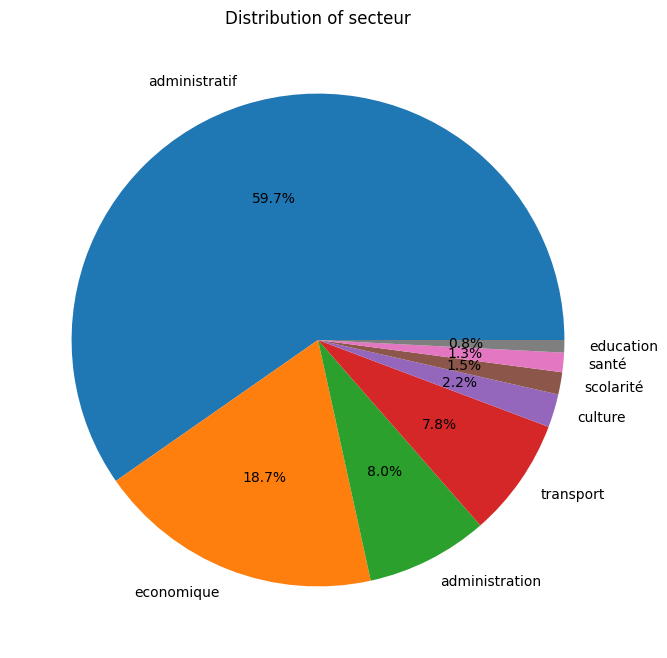

In [23]:
secteur_counts = dataset_final['secteur'].value_counts()
plt.figure(figsize=(10,8))
plt.pie(secteur_counts, labels = secteur_counts.index, autopct='%1.1f%%')
plt.title('Distribution of secteur')
plt.show()
plt.show() 

In [ ]:
from transformers import GPT2Tokenizer, GPT2Model

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2')
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
questions = list(df['question'])
answers = list(df['reponse'])
inputs_questions = tokenizer(questions, return_tensors='pt', padding=True, truncation=True)
outputs_questions = model(**inputs_questions)
inputs_answers = tokenizer(answers, return_tensors='pt', padding=True, truncation=True)
outputs_answers = model(**inputs_answers)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

In [ ]:
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
questions = list(df['question'])
reponses = list(df['reponse'])
encoded_questions = tokenizer(questions, return_tensors='pt', padding=True, truncation=True)
output_questions2 = model(**encoded_questions)
encoded_reponses = tokenizer(reponses, return_tensors='pt', padding=True, truncation=True)
output_reponses2 = model(**encoded_reponses)
# Les embeddings des textes sont maintenant disponibles
embeddings_questions = output_questions.last_hidden_state
embeddings_questions = output_reponses.last_hidden_state